In [229]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

In [230]:
data = pd.read_csv('titanic.csv')

In [231]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [232]:
columns_target = ['Survived']
columns_train = ['Pclass', 'Sex', 'Age','Fare']

In [233]:
X = data[columns_train]
Y = data[columns_target]

In [234]:
X['Sex'].isnull().sum()

0

In [235]:
X['Pclass'].isnull().sum()

0

In [236]:
X['Age'].isnull().sum()

177

In [237]:
X['Fare'].isnull().sum()

0

In [238]:
pd.options.mode.chained_assignment = None

In [239]:
X['Age'] = X['Age'].fillna(X['Age'].median())


In [240]:
X['Age'].isnull().sum()

0

In [241]:
d = {'male': 0, 'female': 1}

In [242]:
X['Sex'] = X['Sex'].apply(lambda x:d[x])

In [243]:
X['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [244]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [245]:
clf = tree.DecisionTreeClassifier(max_depth=5, random_state=21)

In [246]:
bagging = BaggingClassifier(clf, n_estimators=100)

In [247]:
bagging.fit(X_train, Y_train)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                   random_state=21),
                  n_estimators=100)

In [248]:
bagging.score(X_test, Y_test)

0.8333333333333334

In [249]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=21)

In [250]:
clf.score(X_test, Y_test)

0.7666666666666667

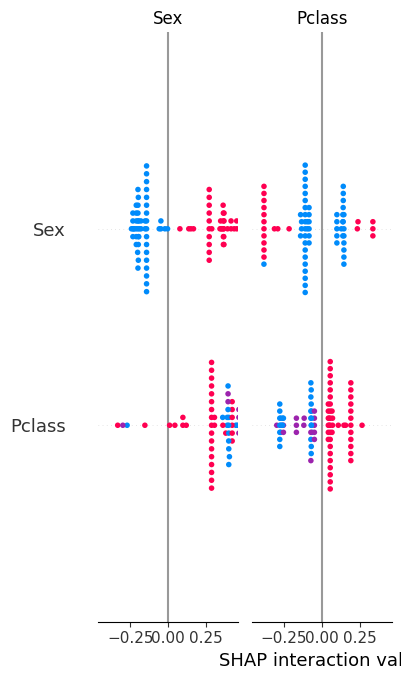

In [251]:
import shap
explainer = shap.Explainer(clf, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X_train.columns.values)
# Опционально: Для получения вероятностей классов
probabilities = clf.predict_proba(X_test)

In [252]:
from sklearn import svm

In [253]:
predmodel = svm.LinearSVC()


In [254]:
predmodel.fit(X_train,Y_train)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC()

In [255]:
predmodel.predict(X_test[0:10])

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [256]:
predmodel.score(X_test,Y_test)

0.8222222222222222